# GPR Dashboard Widgets

This notebook contains the outline for the dashboard skeleton. The widgets are not fully functioning yet, but will be under heavy construction over the next week. Widgets are expected to get werkin' by Monday April 30th.

Author: Sofia Ingersoll

To-Dos:
- Check r^2 `plot_FAST_accuracy()` note
- Get them widgets werkin!
- Plot titles match what will be selected via dashboard side, so we need to add the full names in dictionary for these to be called later

In [1]:
import xarray as xr
import pickle
from utils import * 

In [2]:
# Request an additional 10 cores of power for processing from the server
client = get_cluster("UCSB0021", cores = 30)
# apply peer2peer network communication across multiple devices
client.cluster

Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/singersoll/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://128.117.208.103:34549,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/singersoll/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
param, var, param_name, var_name = read_n_wrangle("medlynintercept","LNC")

In [3]:
param, var, param_name, var_name = read_n_wrangle("leafcn","LNC")

In [4]:
gpr_model, y_pred, y_std, y_test, X_test, r2 = train_emulator(param, var)

R^2: 0.9436217492785405
RMSE: 0.04635041296076164
Mean Absolute Error: 0.0363568749639293


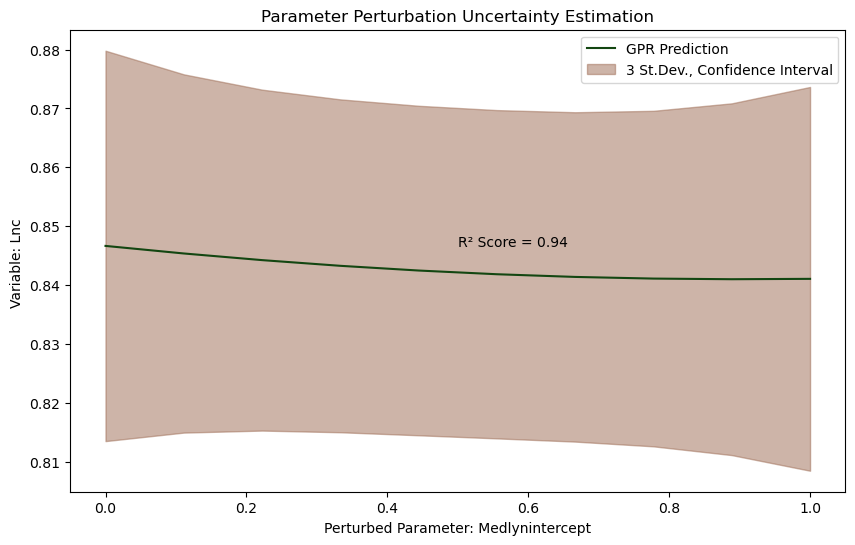

In [5]:
emulator_plot = plot_emulator(gpr_model, y_test, r2)

# Notes about potential tweaks
Need to double check w/ Dan, do we want the R^2 displayed to be the emulation R^2 or the corrcoef(y_test, y_pred). I would suspect it's the latter, but I have this random memory from an old meeting that is telling my the former, so I'm writing this note to double check. Currently it is the emulation r^2 generated in `train_emulator()`

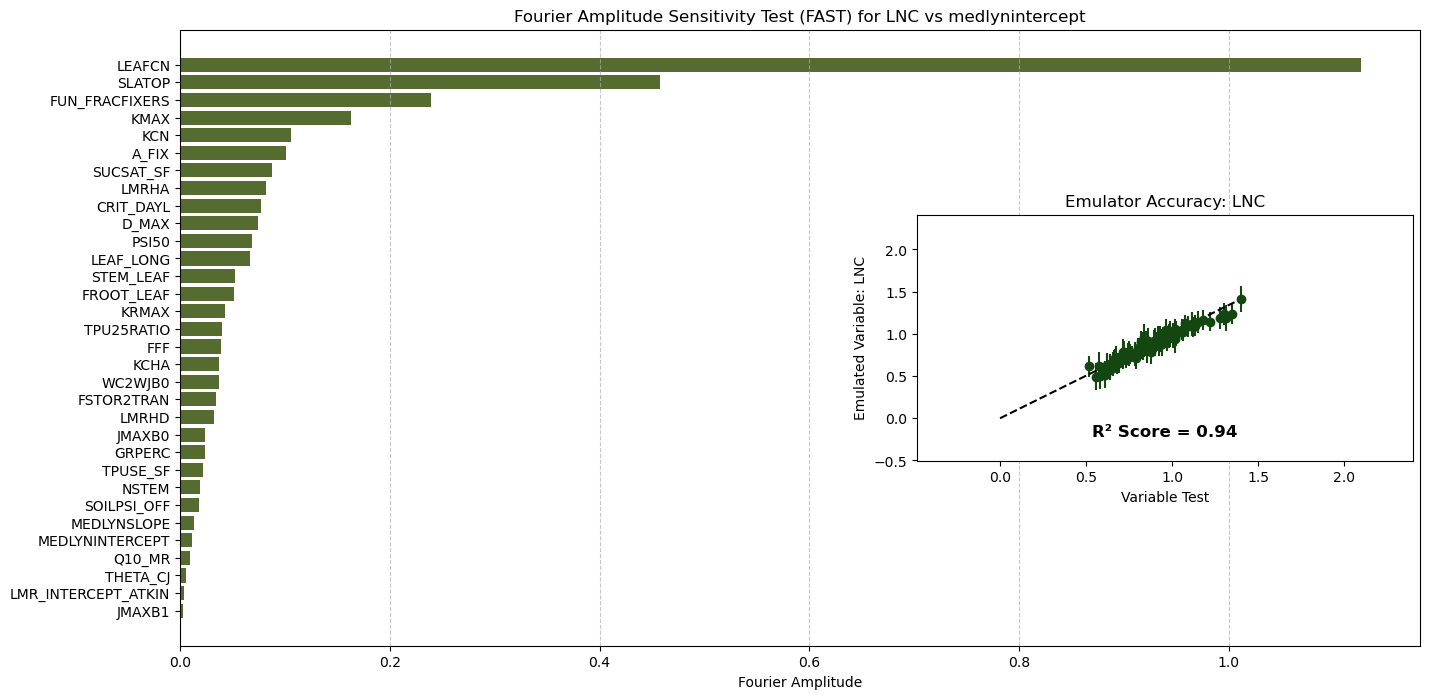

In [6]:
plot_FAST_accuracy(gpr_model, r2, y_test, y_pred, y_std)

# Dashboard

## Wrangling function

In [7]:
def dashboard_wrangling(param, var):
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----    Subset User Selection Funct     ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    params, var_avg, param_name, var_name = read_n_wrangle(param, var)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----       Train Emulator Function      ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  
    gpr_model, y_pred, y_std, y_test, X_test, r2 = train_emulator(params, var_avg)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----       Plot Emulation Function      ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
    Plot_1 = plot_emulator(gpr_model, y_test, r2)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----    Plot Accuracy Function      ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
    Plot_2 = plot_FAST_accuracy(gpr_model, r2, y_test, y_pred, y_std)
    
    # Return both plots
    return pn.Row(Plot_1, Plot_2)

R^2: 0.9436217492785405
RMSE: 0.04635041296076164
Mean Absolute Error: 0.0363568749639293


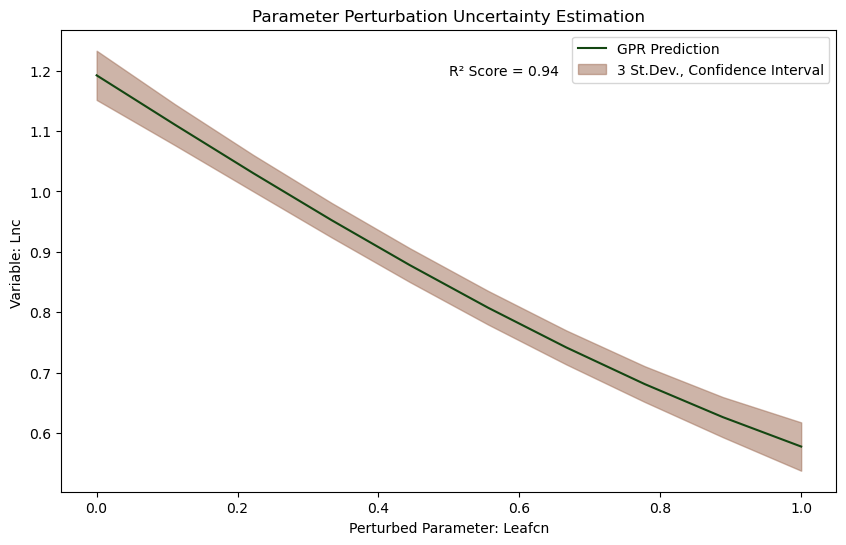

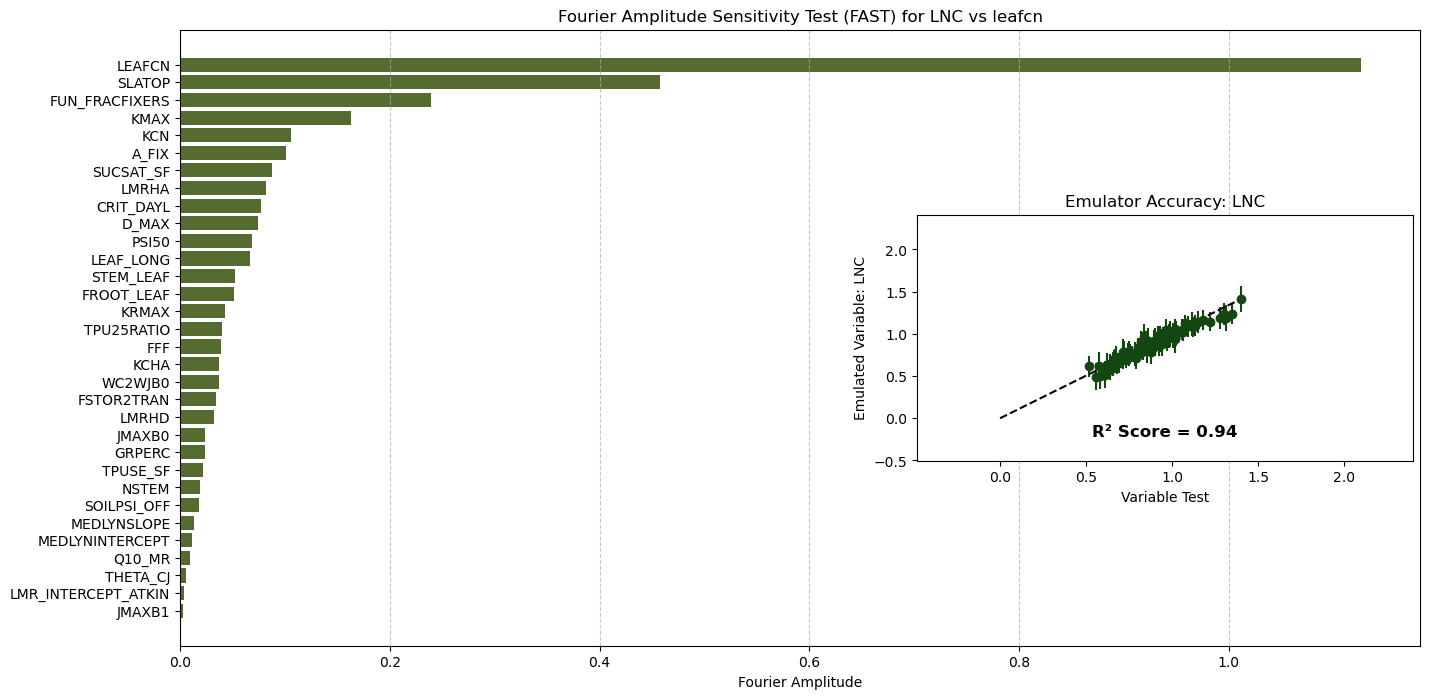

Row
    [0] Str(None)
    [1] Str(None)

In [8]:
dashboard_wrangling('leafcn', 'LNC')

## Working on Widgets

In [12]:
import param
def dashboard_wrangling(param, var):
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----    Subset User Selection Funct     ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    params, var_avg, param_name, var_name = read_n_wrangle(param, var)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----       Train Emulator Function      ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  
    gpr_model, y_pred, y_std, y_test, X_test, r2 = train_emulator(params, var_avg)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----       Plot Emulation Function      ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
    Plot_1 = plot_emulator(gpr_model, y_test, r2)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # ----    Plot Accuracy Function      ----
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
    Plot_2 = plot_FAST_accuracy(gpr_model, r2, y_test, y_pred, y_std)
    
    pn.Row(Plot_1, Plot_2)

class Selections(param.Parameterized):
    parameter = param.Selector(objects=['leafcn'])
    variable = param.Selector(objects=['GPP', 'NBP', 'TOTVEGC', 'TLAI', 'EFLX_LH_TOT', 'SOILWATER_10CM', 'QRUNOFF', 'FSR', 'FAREA_BURNED', 'SNOWDP'])

    def view(self):
        # Call dashboard_wrangling with the selected parameter and variable
        plots = dashboard_wrangling(self.parameter, self.variable)

        # Convert Matplotlib figures to Panel objects
        plot_pane1 = pn.pane.Matplotlib(plots[0])
        plot_pane2 = pn.pane.Matplotlib(plots[1])

        # Return a Panel layout containing the converted Panel objects
        return pn.Column(plot_pane1, plot_pane2)

R^2: 0.7807394793728104
RMSE: 3.3481285983264553e-06
Mean Absolute Error: 2.554710015269346e-06


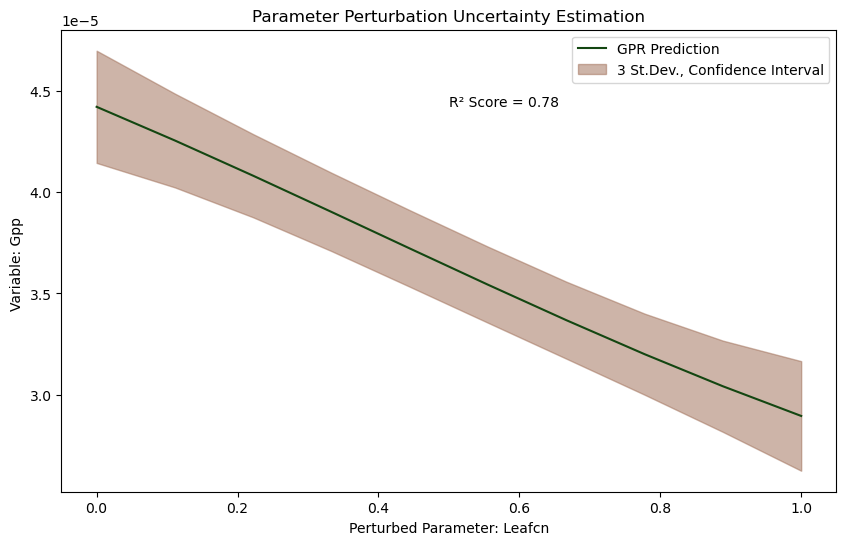

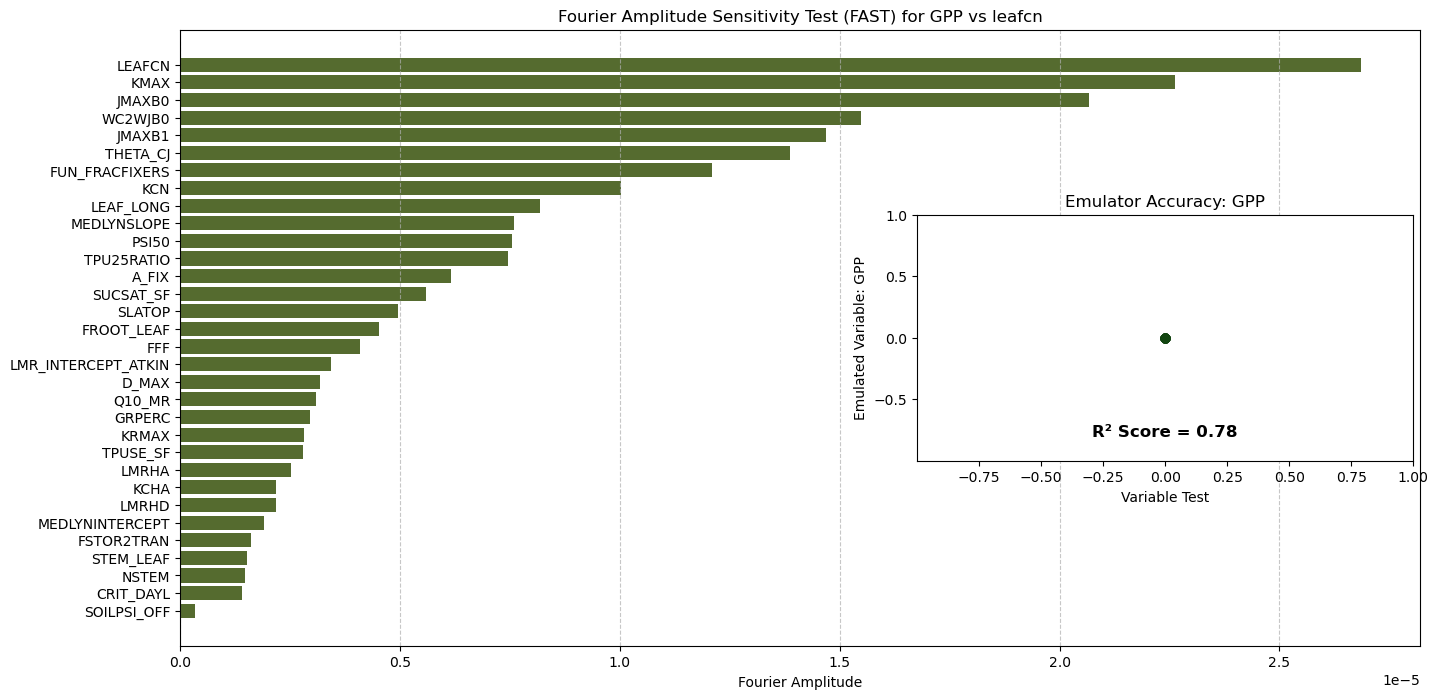

TypeError: 'NoneType' object is not subscriptable

In [13]:
# Create an instance of Selections and display it using Panel
obj = Selections()
pn.Row(obj.param, obj.view).servable()

In [ ]:
class Selections(param.Parameterized):
    parameter = param.Selector(objects=['leafcn'])
    variable = param.Selector(objects=['GPP', 'NBP', 'TOTVEGC', 'TLAI', 'EFLX_LH_TOT', 'SOILWATER_10CM', 'QRUNOFF', 'FSR', 'FAREA_BURNED', 'SNOWDP'])

    def view(self):
        # Call dashboard_wrangling with the selected parameter and variable
        plots = dashboard_wrangling_check2(self.parameter, self.variable)

        # Convert Matplotlib figures to Panel objects
        plot_pane1 = pn.pane.Matplotlib(plots[0])
        plot_pane2 = pn.pane.Matplotlib(plots[1])

        # Return a Panel layout containing the converted Panel objects
        return pn.Column(plot_pane1, plot_pane2)

# Create an instance of Selections and display it using Panel
obj = Selections()
pn.Row(obj.param, obj.view).servable()